In [42]:
# Create augmentations with original data
import csv

# File path with measurements 
file_path_G1R1 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-21-2025_G1_R1.csv'
file_path_G1R2 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-21-2025_G1_R2.csv'
file_path_G1R3 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-21-2025_G1_R3.csv'
file_path_G2R1 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-24-2025_G2_R1.csv'
file_path_G2R2 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-25-2025_G2_R2.csv'
file_path_G2R3 = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-26-2025_G2_R3.csv'

def read_data(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        n = 0
        data = []
        for i,row in enumerate(reader):
            data.append(row)
    return data

data_G1R1 = read_data(file_path_G1R1)
data_G1R2 = read_data(file_path_G1R2)
data_G1R3 = read_data(file_path_G1R3)
data_G2R1 = read_data(file_path_G2R1)
data_G2R2 = read_data(file_path_G2R2)
data_G2R3 = read_data(file_path_G2R3)

In [72]:
# Poner todas las fuentes de datos en una lista
all_data_sources = [data_G1R1, data_G1R2, data_G1R3, data_G2R1, data_G2R2, data_G2R3]

# Iterar sobre cada 'source' en 'all_data_sources',
# luego sobre cada 'item' en 'source',
# y añadir 'item' a la lista si 'item[1]' es '0'.
data = [item for source in all_data_sources for item in source if item[1] == '150']
#data1 = [item for source in all_data_sources for item in source if item[1] == '100']
print(len(data))

19


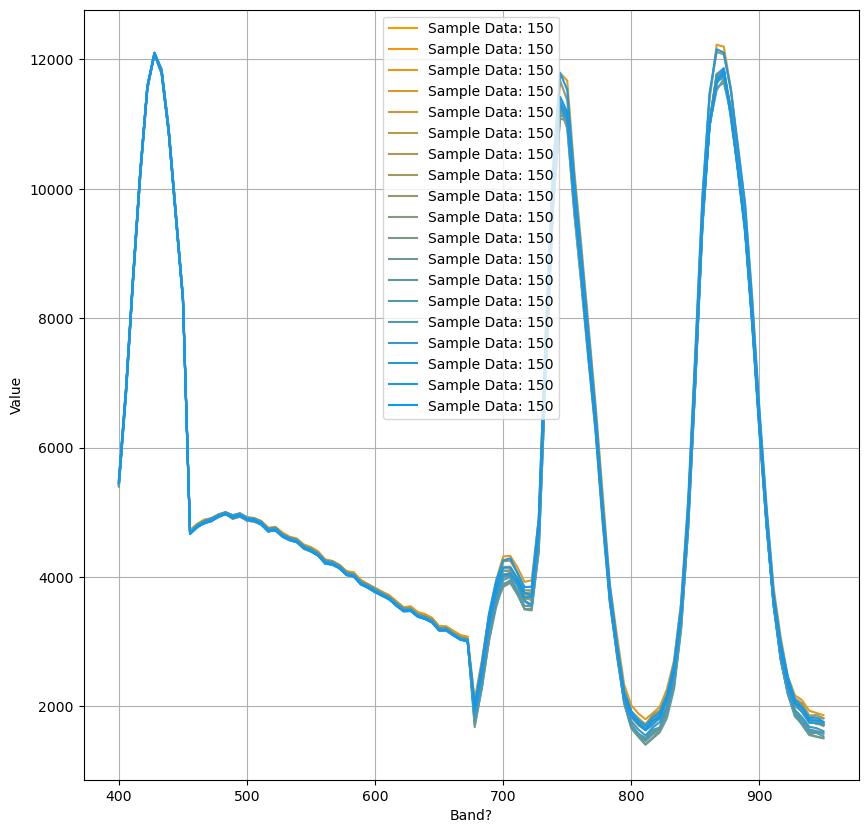

In [73]:
import matplotlib.pyplot as plt
import numpy as np

y_data = []
for i,y_i in enumerate(data): 
    y_row = []
    #print(len(y_i))
    for j in y_i[3:]:
        #print(j)
        if j != '-':
            y_row.append(float(j))
    y_data.append(y_row)

# y_data1 = []
# for i,y_i in enumerate(data1): 
#     y_row = []
#     #print(len(y_i))
#     for j in y_i[3:]:
#         #print(j)
#         if j != '-':
#             y_row.append(float(j))
#     y_data1.append(y_row)
    
x_data = np.linspace(400,950,len(y_data[0]))
#print(len(x_data))

plt.figure(figsize=(10, 10))
prev_cc = y_data[0][1]
b_color = 0.0
r_color = 1.0
for i in range(len(data)):
#for i in range(3):
    cc = data[i][1]
    curr_cc = y_data[i][1]
    if prev_cc != curr_cc:
        b_color = 0.0 + (i/len(data))
        r_color = 1.0 - (i/len(data))
    plt.plot(x_data,y_data[i], label='Sample Data: '+ str(cc), color=(r_color,0.6,b_color))
    prev_cc = curr_cc

# for i in range(len(data1)):
# #for i in range(3):
#     cc = data1[i][1]
#     curr_cc = y_data1[i][1]
#     if prev_cc != curr_cc:
#         g_color = 0.0 + (i/len(data1))
#         r_color = 1.0 - (i/len(data1))
#     plt.plot(x_data,y_data1[i], label='Sample Data: '+ str(cc), color=(r_color,g_color,0.6))
#     prev_cc = curr_cc

plt.xlabel('Band?')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

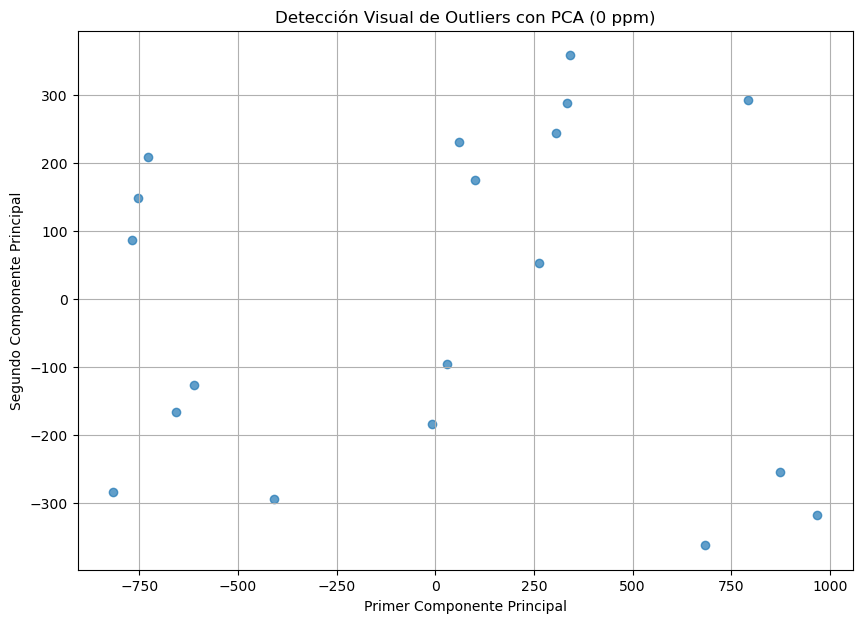

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Configurar y aplicar PCA directamente sobre y_data
# (Asumiendo que y_data ya está cargado y tiene la forma correcta)
pca = PCA(n_components=2)
y_data_pca = pca.fit_transform(y_data)

# 2. Graficar los resultados
plt.figure(figsize=(10, 7))
# Graficamos los nuevos datos transformados (y_data_pca)
plt.scatter(y_data_pca[:, 0], y_data_pca[:, 1], alpha=0.7)
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Detección Visual de Outliers con PCA (0 ppm)')
plt.grid(True)
plt.show()

#

In [64]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Asumiendo que y_data es tu matriz (n_mediciones, 100 bandas)

# 1. Configurar el modelo
# 'contamination=0.05' asume que ~5% de tus datos son outliers.
# Puedes ajustar este valor (ej. 0.02 si son muy pocos) o dejarlo en 'auto'.
clf = IsolationForest(contamination=0.05, random_state=42)

# 2. Entrenar y predecir
# Devuelve '1' para puntos normales (inliers) y '-1' para outliers
preds = clf.fit_predict(y_data)

# 3. Obtener los índices de los outliers
outlier_indices = np.where(preds == -1)[0]

print(f"Total de mediciones: {len(y_data)}")
print(f"Índices de outliers encontrados: {outlier_indices}")
print(data[17])

Total de mediciones: 19
Índices de outliers encontrados: [6]
['Oct26_G2_R3', '100', '---', '5420.0', '6857.0', '8617.0', '10239.0', '11559.0', '12074.0', '11810.0', '10911.0', '9613.0', '8316.0', '4674.0', '4790.0', '4850.0', '4892.0', '4957.0', '4989.0', '4934.0', '4976.0', '4911.0', '4892.0', '4846.0', '4730.0', '4749.0', '4637.0', '4586.0', '4563.0', '4452.0', '4420.0', '4350.0', '4234.0', '4211.0', '4155.0', '4058.0', '4030.0', '3901.0', '3854.0', '3789.0', '3734.0', '3674.0', '3576.0', '3493.0', '3498.0', '3396.0', '3372.0', '3312.0', '3187.0', '3187.0', '3104.0', '3034.0', '3011.0', '-', '1934.0', '2538.0', '3303.0', '3779.0', '4152.0', '4135.0', '3970.0', '3743.0', '3694.0', '4655.0', '7510.0', '9919.0', '11511.0', '11169.0', '9919.0', '8750.0', '7527.0', '6362.0', '4939.0', '3650.0', '2850.0', '2200.0', '1823.0', '1711.0', '1636.0', '1760.0', '1836.0', '2080.0', '2512.0', '3392.0', '4886.0', '7118.0', '9448.0', '11022.0', '11680.0', '11871.0', '11138.0', '10404.0', '9439.0', '7

Datos cargados: 64 muestras.

Se encontraron 21 grupos de concentración únicos.
Tamaño de los grupos:
Concentration
0.0       3
50.0      4
100.0     3
150.0     3
200.0     3
250.0     3
300.0     3
350.0     3
400.0     3
450.0     3
500.0     3
550.0     3
600.0     3
650.0     3
700.0     3
750.0     3
800.0     3
850.0     3
900.0     3
950.0     3
1000.0    3
dtype: int64


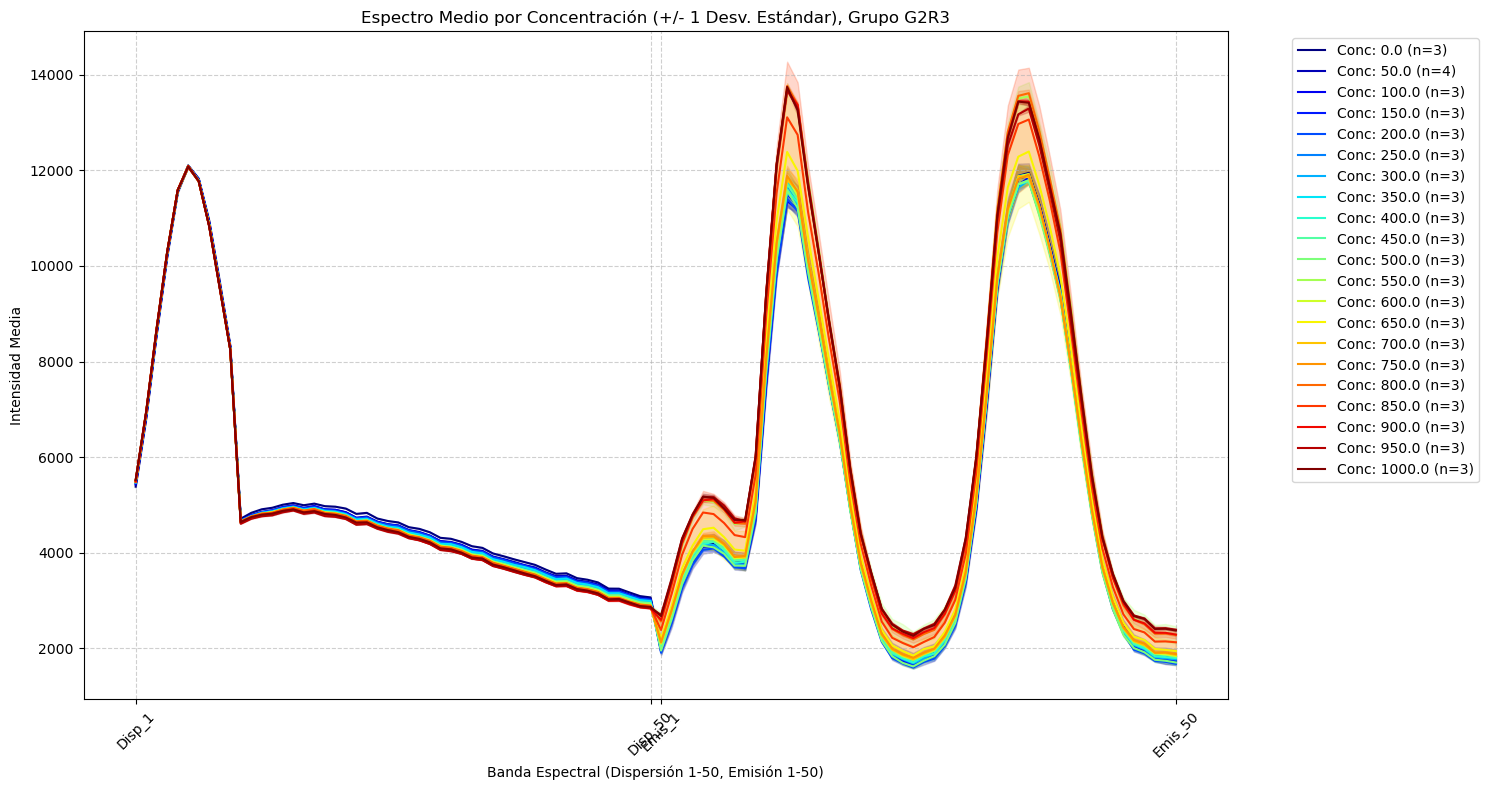

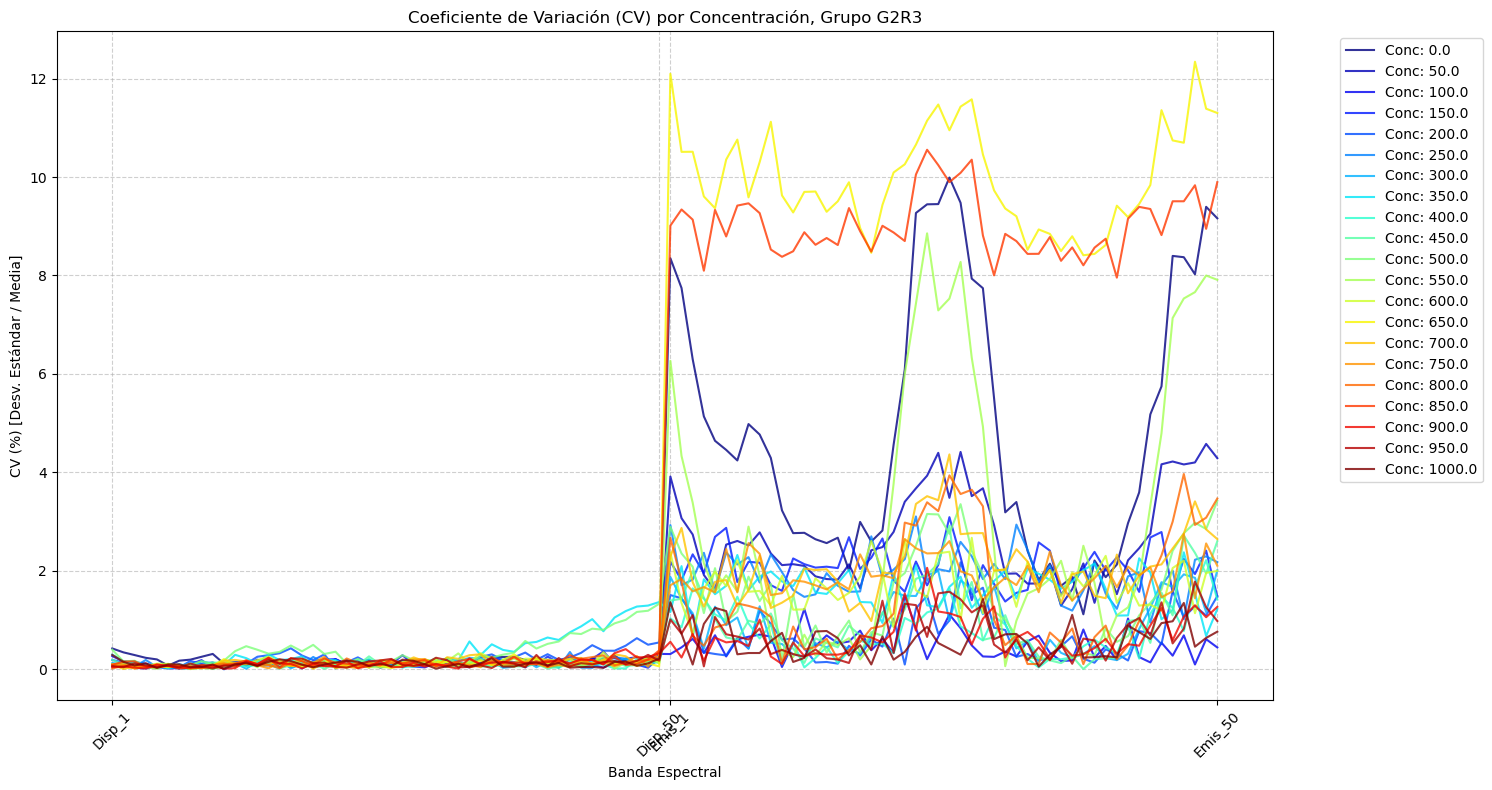

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuración ---
# Actualiza esto con la ruta a tu archivo CSV
# FILE_PATH = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-21-2025_G1_R1.csv'
FILE_PATH = '/Users/andresmr/Documents/Glyphosate_sensor_CFATA/samples/10-26-2025_G2_R3.csv'
G = FILE_PATH.split('.')[0].split('_')[-2]
R = FILE_PATH.split('.')[0].split('_')[-1]
substring = G + R
# Asumiendo que no hay encabezado en el CSV
HEADER = None
# ---------------------

def load_data_for_repetition(file_path):
    """
    Carga y preprocesa el archivo CSV, manteniendo la concentración como etiqueta.
    """
    try:
        data = pd.read_csv(file_path, header=HEADER)
        
        # Col 1: Concentración
        concentration = data.iloc[:, 1].astype(float)
        
        # Col 3-52: Dispersión (50 bandas)
        dispersion = data.iloc[:, 3:53].astype(float)
        
        # Col 54-103: Emisión (50 bandas)
        emission = data.iloc[:, 54:104].astype(float)
        
        # Combinar en un solo DataFrame
        features = pd.concat([dispersion, emission], axis=1)
        feature_names = [f'Disp_{i+1}' for i in range(50)] + [f'Emis_{i+1}' for i in range(50)]
        features.columns = feature_names
        
        # Añadir la concentración para agrupar
        features['Concentration'] = concentration
        
        print(f"Datos cargados: {features.shape[0]} muestras.")
        return features

    except FileNotFoundError:
        print(f"Error: No se encontró el archivo en {file_path}")
        return None
    except Exception as e:
        print(f"Error al cargar los datos: {e}")
        return None

def plot_mean_spectra(grouped_data):
    """
    Grafica el espectro medio para cada concentración con bandas de desviación estándar.
    """
    plt.figure(figsize=(15, 8))
    
    # Obtener un mapa de colores para las concentraciones
    colors = plt.cm.jet(np.linspace(0, 1, grouped_data.ngroups))
    
    for (concentration, group), color in zip(grouped_data, colors):
        # Excluir la columna 'Concentration' del cálculo
        spectra = group.drop('Concentration', axis=1)
        
        mean_spectrum = spectra.mean(axis=0)
        std_spectrum = spectra.std(axis=0)
        
        # Graficar la media
        plt.plot(mean_spectrum.index, mean_spectrum, label=f'Conc: {concentration} (n={len(group)})', color=color)
        
        # Graficar la banda de +/- 1 Desviación Estándar
        plt.fill_between(mean_spectrum.index, 
                         mean_spectrum - std_spectrum, 
                         mean_spectrum + std_spectrum, 
                         color=color, alpha=0.2)

    plt.title('Espectro Medio por Concentración (+/- 1 Desv. Estándar), Grupo '+substring)
    plt.xlabel('Banda Espectral (Dispersión 1-50, Emisión 1-50)')
    plt.ylabel('Intensidad Media')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Poner marcas en el eje x para que sea legible
    tick_locations = [0, 49, 50, 99] # Inicio/Fin Dispersión, Inicio/Fin Emisión
    tick_labels = ['Disp_1', 'Disp_50', 'Emis_1', 'Emis_50']
    plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=45)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def plot_coefficient_of_variation(grouped_data):
    """
    Grafica el Coeficiente de Variación (CV) para cada concentración.
    CV = Desviación Estándar / Media
    """
    plt.figure(figsize=(15, 8))
    
    colors = plt.cm.jet(np.linspace(0, 1, grouped_data.ngroups))
    
    for (concentration, group), color in zip(grouped_data, colors):
        spectra = group.drop('Concentration', axis=1)
        
        mean_spectrum = spectra.mean(axis=0)
        std_spectrum = spectra.std(axis=0)
        
        # Calcular Coeficiente de Variación. 
        # Añadir un 'epsilon' para evitar división por cero si la media es 0.
        epsilon = 1e-9
        cv_spectrum = (std_spectrum / (mean_spectrum + epsilon)) * 100 # en porcentaje
        
        plt.plot(cv_spectrum.index, cv_spectrum, label=f'Conc: {concentration}', color=color, alpha=0.8)

    plt.title('Coeficiente de Variación (CV) por Concentración, Grupo '+substring)
    plt.xlabel('Banda Espectral')
    plt.ylabel('CV (%) [Desv. Estándar / Media]')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Poner marcas en el eje x
    tick_locations = [0, 49, 50, 99]
    tick_labels = ['Disp_1', 'Disp_50', 'Emis_1', 'Emis_50']
    plt.xticks(ticks=tick_locations, labels=tick_labels, rotation=45)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def main():
    features_df = load_data_for_repetition(FILE_PATH)
    
    if features_df is None:
        return
        
    # Agrupar por la columna 'Concentration'
    grouped = features_df.groupby('Concentration')
    
    print(f"\nSe encontraron {grouped.ngroups} grupos de concentración únicos.")
    print("Tamaño de los grupos:")
    print(grouped.size())
    
    # --- Visualización ---
    
    # 1. Gráfico de Espectros Medios
    #    Responde: ¿Se ven diferentes los espectros promedio de cada concentración?
    #    Si las bandas sombreadas (desv. estándar) se solapan mucho,
    #    será difícil para el modelo distinguirlas.
    plot_mean_spectra(grouped)
    
    # 2. Gráfico de Coeficiente de Variación (CV)
    #    Responde: ¿Qué tan ruidosas son las mediciones para una misma concentración?
    #    Un CV alto (ej. > 10-20%) en bandas clave puede indicar un problema
    #    de repetibilidad que está afectando a tu RNN.
    plot_coefficient_of_variation(grouped)

if __name__ == "__main__":
    main()

Datos cargados: 64 muestras, 100 características.
Objetivo (concentración) cargado: 64 muestras.

Calculando importancia de características con Random Forest...


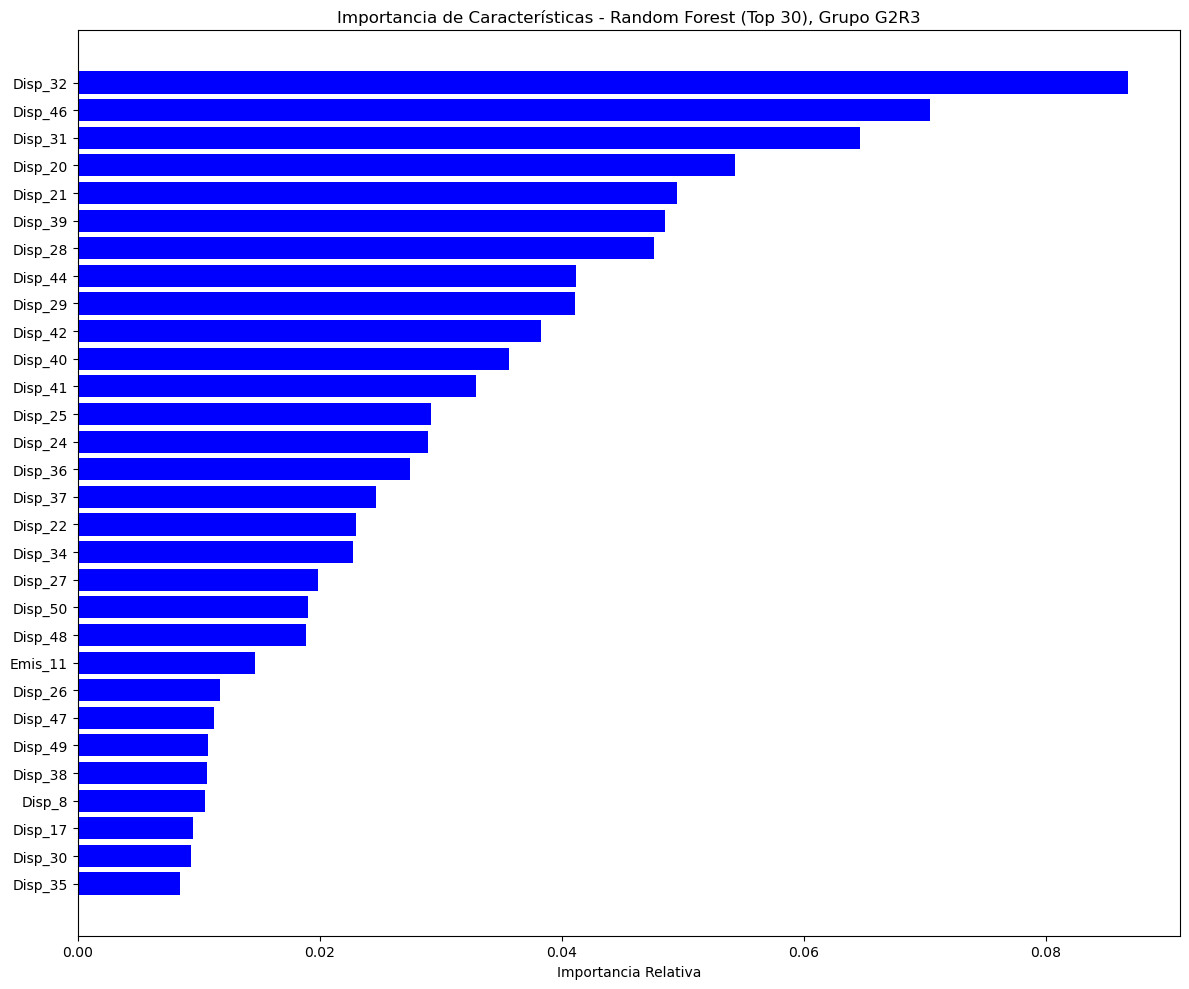


Top 10 características (Random Forest):
Disp_32: 0.0868
Disp_46: 0.0704
Disp_31: 0.0646
Disp_20: 0.0543
Disp_21: 0.0495
Disp_39: 0.0486
Disp_28: 0.0476
Disp_44: 0.0412
Disp_29: 0.0411
Disp_42: 0.0383


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# --- Configuración ---
# Actualiza esto con la ruta a tu archivo CSV
# Asumiendo que no hay encabezado en el CSV
HEADER = None 
# ---------------------

def load_and_preprocess_data(file_path):
    """
    Carga y preprocesa el archivo CSV.
    Extrae ID, concentración y las 100 bandas espectrales.
    """
    try:
        # Cargar datos. Asumimos que no hay encabezados.
        data = pd.read_csv(file_path, header=HEADER)

        # Extraer las columnas relevantes
        # Col 0: ID
        # Col 1: Concentración (nuestro objetivo 'y')
        # Col 3-52: Bandas de dispersión (50 bandas)
        # Col 54-103: Bandas de emisión (50 bandas)
        
        y = data.iloc[:, 1].astype(float)
        
        # Combinar bandas de dispersión y emisión en una matriz de características 'X'
        dispersion = data.iloc[:, 3:53].astype(float)
        emission = data.iloc[:, 54:104].astype(float)
        
        X = pd.concat([dispersion, emission], axis=1)
        
        # Crear nombres de características para la visualización
        feature_names = [f'Disp_{i+1}' for i in range(50)] + [f'Emis_{i+1}' for i in range(50)]
        X.columns = feature_names
        
        print(f"Datos cargados: {X.shape[0]} muestras, {X.shape[1]} características.")
        print(f"Objetivo (concentración) cargado: {y.shape[0]} muestras.")
        
        return X, y, feature_names

    except FileNotFoundError:
        print(f"Error: No se encontró el archivo en {file_path}")
        print("Por favor, actualiza la variable FILE_PATH.")
        return None, None, None
    except Exception as e:
        print(f"Error al cargar los datos: {e}")
        print("Verifica el formato del archivo y las columnas seleccionadas.")
        return None, None, None

def plot_feature_importance(importances, names, title):
    """
    Visualiza las importancias de las características en un gráfico de barras.
    """
    indices = np.argsort(importances)[-30:] # Mostrar solo las 30 más importantes

    plt.figure(figsize=(12, 10))
    plt.title(f'Importancia de Características - {title} (Top 30), Grupo '+substring)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [names[i] for i in indices])
    plt.xlabel('Importancia Relativa')
    plt.tight_layout()
    plt.show()

def main():
    X, y, feature_names = load_and_preprocess_data(FILE_PATH)
    
    if X is None:
        return

    # 1. Normalizar los datos
    # Es crucial para muchos modelos, incluidos los de ML
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # --- Método 1: Random Forest (Recomendado) ---
    # Este método es robusto y captura interacciones no lineales.
    print("\nCalculando importancia de características con Random Forest...")
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_scaled, y)
    
    rf_importances = rf.feature_importances_
    plot_feature_importance(rf_importances, feature_names, "Random Forest")
    
    top_10_rf_indices = np.argsort(rf_importances)[-10:]
    print("\nTop 10 características (Random Forest):")
    for i in reversed(top_10_rf_indices):
        print(f"{feature_names[i]}: {rf_importances[i]:.4f}")

    # # --- Método 2: Correlación Univariada (SelectKBest) ---
    # # Esto es más cercano a lo que describiste (correlación simple).
    # # Utiliza f_regression (básicamente una puntuación F de ANOVA).
    # print("\nCalculando importancia con Correlación Univariada (f_regression)...")
    
    # # Usamos k='all' para obtener la puntuación de todas las características
    # skb = SelectKBest(score_func=f_regression, k='all')
    # skb.fit(X_scaled, y)
    
    # skb_scores = skb.scores_
    # # Normalizar scores para que se parezcan a 'importancias' (0 a 1)
    # skb_importances = skb_scores / np.sum(skb_scores)
    
    # plot_feature_importance(skb_importances, feature_names, "SelectKBest (f_regression)")
    
    # top_10_skb_indices = np.argsort(skb_importances)[-10:]
    # print("\nTop 10 características (SelectKBest):")
    # for i in reversed(top_10_skb_indices):
    #     print(f"{feature_names[i]}: {skb_importances[i]:.4f}")
        
    # print("\n--- Interpretación ---")
    # print("El gráfico de Random Forest muestra qué bandas (features) utiliza más el modelo para tomar decisiones.")
    # print("Un valor alto significa que la banda es un predictor importante.")
    # print("El gráfico de SelectKBest muestra las bandas que, individualmente, tienen la correlación estadística más fuerte con la concentración.")
    # print("Puedes usar las 'Top 10' bandas de RF como entrada para tu RNN optimizado.")

if __name__ == "__main__":
    main()